In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
#Load the data 
file_path = "D:/Bhavesh/Internshala Data Analytics/Course 6 Machine Learning/Project/Customer_data - customer_data.csv"
df = pd.read_csv(file_path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [11]:
# 2. Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# 3. Handling Missing Values
df = df.dropna()

In [15]:
# 4. Data Preprocessing
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df)

In [17]:
# 5. Splitting the data into features and target variable
features = df.drop(columns=['Churn'])
target = df['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#7 Model Building 
# Initializing and training the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

In [36]:
# 8. Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7889125799573561
Precision: 0.6379928315412187
Recall: 0.47593582887700536
F1 Score: 0.5451761102603369
[[932 101]
 [196 178]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



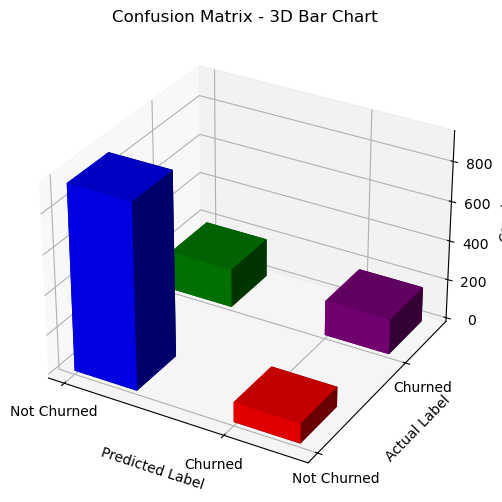

In [39]:
# 9. Visualization
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels
classes = ["Not Churned", "Churned"]  # Adjust based on actual class names
x_labels, y_labels = np.meshgrid(np.arange(cm.shape[1]), np.arange(cm.shape[0]))

# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define bar width and depth
width = depth = 0.4

# Create 3D bars
x_pos = x_labels.flatten()
y_pos = y_labels.flatten()
z_pos = np.zeros_like(cm).flatten()
values = cm.flatten()
ax.bar3d(x_pos, y_pos, z_pos, width, depth, values, shade=True, color=['blue', 'red', 'green', 'purple'])

# Set labels and title
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_zlabel("Count")
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set_title("Confusion Matrix - 3D Bar Chart")

plt.show()

In [45]:
# 10. Prediction on New Data
new_data = X_test[:5]
new_predictions= rf_classifier.predict(new_data)
print("Predictions for new data:", new_predictions)

Predictions for new data: [0 0 1 0 0]


Video Link :- https://drive.google.com/file/d/1Ayl8qAHt0Ccsz_DWerBymbuYlPd8j5Gy/view?usp=sharing